In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')  # 사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
boston_df = pd.DataFrame(
    data=data,
    columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
)

boston_df['PRICE']=target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* INDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

In [4]:
# Feature와 Target의 상관관계 확인
# 어떤 Feature가 Target을 예측하는데 있어서 결정적인 역할을 하는지 분석
boston_df.corr()['PRICE'].sort_values()

# LSTAT, RM 이 상관 관계가 높다. 

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
PRICE      1.000000
Name: PRICE, dtype: float64

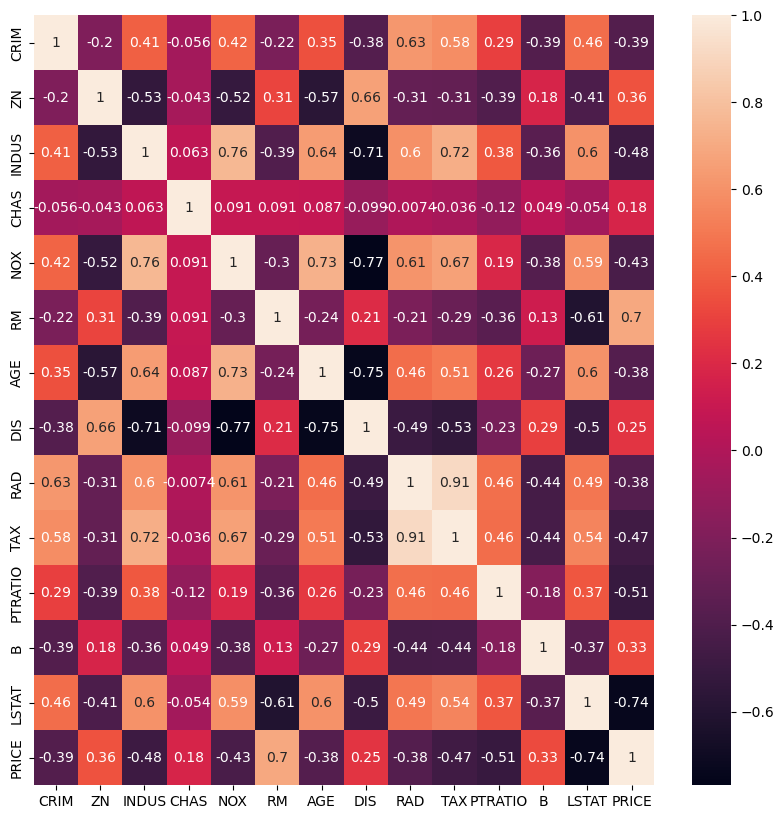

In [5]:
# Feature 끼리의 상관관계 확인 - 너무 많은 상관성을 가진 데이터를 확인할 수 있다.( 다중공선성 확인 )
plt.figure(figsize=(10, 10))

corr_df = boston_df.corr()
sns.heatmap(
    data=corr_df,
    annot=True
)

plt.show()
# 강력한 상관관계를 가진 항목들은 비즈니스 분석이 필요하다.

# 데이터 분할

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    boston_df.drop('PRICE', axis=1),
    boston_df['PRICE'],
    test_size=0.2,
    random_state=42
)

# 모델 훈련

In [8]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

LinearRegression()

# 예측

In [9]:
y_pred = lr_reg.predict(X_test)
y_pred[:3]

array([28.99672362, 36.02556534, 14.81694405])

In [10]:
# 무엇을 학습했는가?
# 가중치, 편향 ( 모델 파라미터 )
print("가중치 W : {}".format(lr_reg.coef_))
print("편향 b : {}".format(lr_reg.intercept_))

가중치 W : [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
편향 b : 30.24675099392408


# 평가

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # mse에 루트를 씌우면 rmse
r2 = r2_score(y_test, y_pred) # accuracy_score와 같은 기능. 즉 모델의 점수개념. model.score 로 구할 수 있다.

print("MSE : {:.3f}".format(mse))
print("RMSE : {:.3f}".format(rmse))

print()
print("R2 : {:.3f}".format(r2))
print("Score : {:.3f}".format(lr_reg.score(X_test, y_test)))

MSE : 24.291
RMSE : 4.929

R2 : 0.669
Score : 0.669


# 다항회귀를 활용한 보스턴 주택가격

In [12]:
from sklearn.preprocessing import PolynomialFeatures

sample = np.arange(6).reshape(3, 2)
print("1차 다항식의 feature : \n{}".format(sample))

1차 다항식의 feature : 
[[0 1]
 [2 3]
 [4 5]]


In [13]:
poly = PolynomialFeatures(degree=2) # degree 파라미터를 이용해 몇 차식을 만들 것인지 지정
sample_ftr = poly.fit_transform(sample)
print("2차 다항식의 feature : \n{}".format(sample_ftr))

2차 다항식의 feature : 
[[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


In [24]:
# dgree 3인 경우
boston_poly = PolynomialFeatures(degree=3, include_bias=False)

X_poly_3 = boston_poly.fit_transform(X_train)

X_poly_3.shape, X_train.shape

((404, 559), (404, 13))

In [15]:
lr_reg_poly = LinearRegression().fit(X_poly_3, y_train)

In [16]:
# 훈련 데이터가 다항회귀 데이터로 변환 됐으니까 테스트 데이터도 변환
X_poly_test_3 = boston_poly.transform(X_test)
X_poly_test_3.shape

(102, 559)

In [17]:
y_test_pred = lr_reg_poly.predict(X_poly_test_3)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2  = r2_score(y_test, y_test_pred)

print("Test MSE : {:.3f}".format(test_mse))
print("Test RMSE : {:.3f}".format(test_rmse))
print("Test R2 : {:.3f}".format(test_r2))

Test MSE : 129848.108
Test RMSE : 360.344
Test R2 : -1769.645


In [18]:
y_pred = lr_reg_poly.predict(X_poly_3)

mse  = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_train, y_pred)

print("MSE : {:.3f} / RMSE : {:.3f} / R2 : {:.3f}".format(mse, rmse, r2))
# 다항회귀가 엄청나게 복잡한 곡선을 그리며 과대적합을 하고 있다는것을 알 수 있다.

MSE : 0.000 / RMSE : 0.000 / R2 : 1.000


In [20]:
# dgree 2 인 경우
boston_poly = PolynomialFeatures(degree=2, include_bias=False)

X_poly_2 = boston_poly.fit_transform(X_train)

lr_reg_poly = LinearRegression().fit(X_poly_2, y_train)
X_poly_test_2 = boston_poly.transform(X_test)

In [22]:
y_test_pred = lr_reg_poly.predict(X_poly_test_2)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2  = r2_score(y_test, y_test_pred)

print("Test MSE : {:.3f}".format(test_mse))
print("Test RMSE : {:.3f}".format(test_rmse))
print("Test R2 : {:.3f}".format(test_r2))

Test MSE : 14.257
Test RMSE : 3.776
Test R2 : 0.806


In [23]:
y_pred = lr_reg_poly.predict(X_poly_2)

mse  = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_train, y_pred)

print("MSE : {:.3f} / RMSE : {:.3f} / R2 : {:.3f}".format(mse, rmse, r2))
# 최고의 dgree는 2라고 볼 수 있다.

MSE : 5.131 / RMSE : 2.265 / R2 : 0.941
